# Wikidata Ogham Sites Visualisation

This notebook fetches Ogham data using a SPARQL query from Wikidata and creates bar charts.

## Define SPARQL query service

In [22]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

def querySparql(query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.queryAndConvert()
    return results['results']['bindings']


## Define the SPARQL Query

In [23]:
# Updated SPARQL Query
oghamQuery = """
SELECT ?item ?itemLabel ?geo ?site ?siteLabel ?county ?countyLabel WHERE { 
  ?item wdt:P31 wd:Q2016147.
  ?item wdt:P189 ?site.
  ?site wdt:P31 wd:Q72617071.
  ?item wdt:P189 ?county.
  ?county wdt:P31 wd:Q179872.
  OPTIONAL { ?item wdt:P625 ?geo. }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

## Fetch Data and Convert to DataFrame

In [24]:
# Fetch data using the SPARQL query
sparql_results = querySparql(oghamQuery)

# Convert SPARQL JSON results into a DataFrame
data = []
for result in sparql_results:
    data.append({
        "item": result['item']['value'],
        "itemLabel": result['itemLabel']['value'],
        "geo": result['geo']['value'] if 'geo' in result else None,
        "site": result['site']['value'],
        "siteLabel": result['siteLabel']['value'],
        "county": result['county']['value'],
        "countyLabel": result['countyLabel']['value'],
    })

df = pd.DataFrame(data)
df

,item,itemLabel,geo,site,siteLabel,county,countyLabel
0,http://www.wikidata.org/entity/Q70892757,CIIC 206 (Ogham Stone Concept by RAS Macalister),Point(-9.747222 52.071944),http://www.wikidata.org/entity/Q85395537,Kilcoolaght East / Kilhullicaha (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
1,http://www.wikidata.org/entity/Q70892761,CIIC 207 (Ogham Stone Concept by RAS Macalister),Point(-9.747222 52.071944),http://www.wikidata.org/entity/Q85395537,Kilcoolaght East / Kilhullicaha (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
2,http://www.wikidata.org/entity/Q70892763,CIIC 208 (Ogham Stone Concept by RAS Macalister),Point(-9.747222 52.071944),http://www.wikidata.org/entity/Q85395537,Kilcoolaght East / Kilhullicaha (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
3,http://www.wikidata.org/entity/Q70892767,CIIC 209 (Ogham Stone Concept by RAS Macalister),Point(-9.747222 52.071944),http://www.wikidata.org/entity/Q85395537,Kilcoolaght East / Kilhullicaha (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
4,http://www.wikidata.org/entity/Q70892772,CIIC 210 (Ogham Stone Concept by RAS Macalister),Point(-9.747222 52.071944),http://www.wikidata.org/entity/Q85395537,Kilcoolaght East / Kilhullicaha (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
...,...,...,...,...,...,...,...
329,http://www.wikidata.org/entity/Q70892620,CIIC 156 (Ogham Stone Concept by RAS Macalister),Point(-10.031111 52.1725),http://www.wikidata.org/entity/Q85393964,Ballintaggart (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
330,http://www.wikidata.org/entity/Q70892623,CIIC 157 (Ogham Stone Concept by RAS Macalister),Point(-10.031111 52.1725),http://www.wikidata.org/entity/Q85393964,Ballintaggart (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
331,http://www.wikidata.org/entity/Q70892626,CIIC 158 (Ogham Stone Concept by RAS Macalister),Point(-10.031111 52.1725),http://www.wikidata.org/entity/Q85393964,Ballintaggart (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry
332,http://www.wikidata.org/entity/Q70892629,CIIC 159 (Ogham Stone Concept by RAS Macalister),Point(-10.031111 52.1725),http://www.wikidata.org/entity/Q85393964,Ballintaggart (Ogham Site),http://www.wikidata.org/entity/Q184469,County Kerry


## Visualise the Data with a Bar Chart

C:\Users\flori\AppData\Local\Temp\ipykernel_20720\2971044361.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sites = site_counts.groupby('countyLabel').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


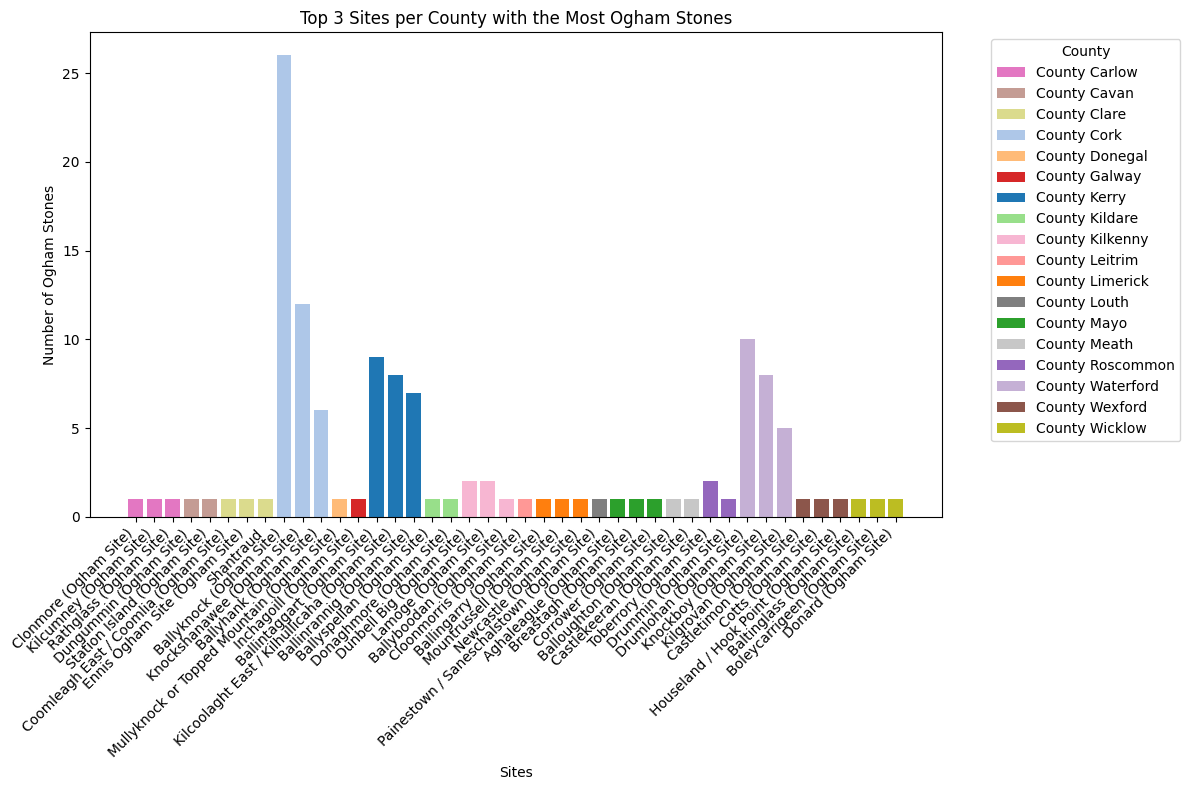

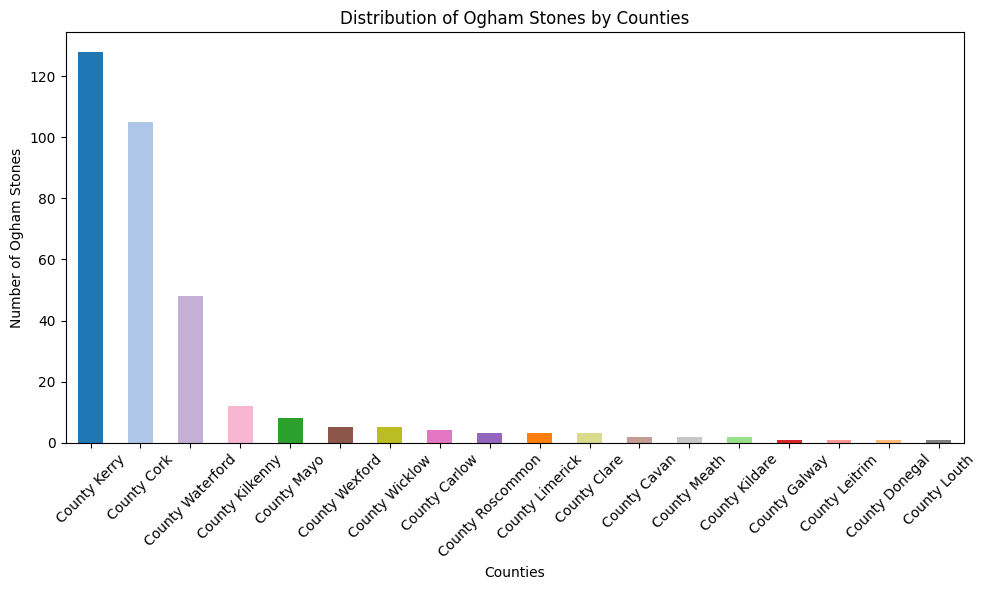

In [25]:
# Check if DataFrame is populated
if df.empty:
    print("No data retrieved from the query.")
else:
    # Define a color palette for counties
    unique_counties = df['countyLabel'].unique()
    county_colors = {county: color for county, color in zip(unique_counties, plt.cm.tab20.colors)}

    # Group by county and site to count stones
    site_counts = df.groupby(['countyLabel', 'siteLabel']).size().reset_index(name='count')

    # Identify the top 3 sites per county
    top_sites = site_counts.groupby('countyLabel').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

    # Create a bar plot for the top 3 sites per county
    plt.figure(figsize=(12, 8))
    for county, group in top_sites.groupby('countyLabel'):
        plt.bar(group['siteLabel'], group['count'], color=county_colors[county], label=county)
    
    plt.title("Top 3 Sites per County with the Most Ogham Stones")
    plt.xlabel("Sites")
    plt.ylabel("Number of Ogham Stones")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Bar plot: Distribution by counties
    county_counts = df['countyLabel'].value_counts()
    plt.figure(figsize=(10, 6))
    county_counts.plot(kind='bar', color=[county_colors[county] for county in county_counts.index])
    plt.title("Distribution of Ogham Stones by Counties")
    plt.xlabel("Counties")
    plt.ylabel("Number of Ogham Stones")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()